### Assigment: Logistic Regression and Multiclass Extensions

A) Binary Logistic Regression from Scratch

1. Dataset Use the Heart Disease dataset from the UCI repository. Originally, the Y variable is an integer with varying values. Recode it to be either 0 (when the original value is 0) or 1 (otherwise).

    - Task: predict whether a patient has heart disease.
    - Standardize numeric features, one-hot encode categorical ones.
    - Split into 70% train / 30% test.

In [1]:
# ============================================================
# Logistic Regression — From Scratch: Part A, B (OvA), C (Softmax)
# ============================================================

!pip -q install ucimlrepo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine

np.random.seed(42)
RANDOM_STATE = 42



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
heart_disease = fetch_ucirepo(id = 45)
X = heart_disease.data.features # features
Y = heart_disease.data.targets # heart disease diagnosis

In [3]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [4]:
# Calcular número y porcentaje de valores faltantes
missing_summary = pd.DataFrame({
    'name': X.columns,
    'missing_count': X.isnull().sum(),
    'missing_%': (X.isnull().mean() * 100).round(2)
})
# Ordenar de mayor a menor porcentaje de faltantes
missing_summary = missing_summary.sort_values(by='missing_%', ascending=False).reset_index(drop=True)

# Mostrar resultado
print("Porcentaje de valores faltantes por variable:")
print(missing_summary)

Porcentaje de valores faltantes por variable:
        name  missing_count  missing_%
0         ca              4       1.32
1       thal              2       0.66
2         cp              0       0.00
3        sex              0       0.00
4        age              0       0.00
5       chol              0       0.00
6   trestbps              0       0.00
7        fbs              0       0.00
8    restecg              0       0.00
9      exang              0       0.00
10   thalach              0       0.00
11     slope              0       0.00
12   oldpeak              0       0.00


In [5]:
#Reemplazando missing values con la mediana
X = X.fillna(X.median())

In [6]:
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [7]:
Y.isna().sum()

num    0
dtype: int64

In [8]:
Y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [9]:
#Recoding de Y a 1 si es mayor a 0
Y = pd.DataFrame(np.where(Y > 0, 1, 0), columns=Y.columns)
#Aplanando Y (303,1) -> (303,)
Y = Y.values.ravel()

In [10]:
Y.shape

(303,)

In [11]:
Y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [12]:
# Ver primeras filas de la variable
print(X['ca'].head())

0    0.0
1    3.0
2    2.0
3    0.0
4    0.0
Name: ca, dtype: float64


In [13]:
#Se realiza la categorizacion One- Hoy enconde porque no se cosnidera un orden entre las variables

In [14]:
#One hot encode ->
X_oneHot = pd.get_dummies(X, columns=["sex","cp","fbs","restecg","exang","slope","ca","thal"])
# Intercepto y convirtiendo todo a float
X_oneHot["Intercepto"]=1
X_oneHot = X_oneHot.astype(float)

In [15]:
X_oneHot

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,Intercepto
0,63.0,145.0,233.0,150.0,2.3,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,67.0,160.0,286.0,108.0,1.5,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,67.0,120.0,229.0,129.0,2.6,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,37.0,130.0,250.0,187.0,3.5,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,41.0,130.0,204.0,172.0,1.4,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,132.0,1.2,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
299,68.0,144.0,193.0,141.0,3.4,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
300,57.0,130.0,131.0,115.0,1.2,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
301,57.0,130.0,236.0,174.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_oneHot, Y, train_size = .7, shuffle = True, random_state=5102025)

In [17]:
X_train.shape

(212, 29)

In [18]:
y_train.shape

(212,)

In [19]:
#Estandarizando columnas numericas
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

X_train_mean = X_train[num_cols].mean()
X_train_std = X_train[num_cols].std()

X_train[num_cols] = (X_train[num_cols] - X_train_mean) / X_train_std
X_test[num_cols] = (X_test[num_cols] - X_train_mean) / X_train_std

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 139 to 50
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         212 non-null    float64
 1   trestbps    212 non-null    float64
 2   chol        212 non-null    float64
 3   thalach     212 non-null    float64
 4   oldpeak     212 non-null    float64
 5   sex_0       212 non-null    float64
 6   sex_1       212 non-null    float64
 7   cp_1        212 non-null    float64
 8   cp_2        212 non-null    float64
 9   cp_3        212 non-null    float64
 10  cp_4        212 non-null    float64
 11  fbs_0       212 non-null    float64
 12  fbs_1       212 non-null    float64
 13  restecg_0   212 non-null    float64
 14  restecg_1   212 non-null    float64
 15  restecg_2   212 non-null    float64
 16  exang_0     212 non-null    float64
 17  exang_1     212 non-null    float64
 18  slope_1     212 non-null    float64
 19  slope_2     212 non-null    float

2. Model Derivation and Implementation
    
    - Implement gradient descent to maximize the log-likelihood (or equivalently, minimize the negative log-likelihood).
    - Show convergence plots for at least two learning rates.

In [21]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def f(X, theta):
    """The sigmoid model we are trying to fit.

    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix

    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return sigmoid(X.dot(theta))

def log_likelihood(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.

    We added the 1e-6 term in order to avoid overflow (inf and -inf).

    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

def loglik_gradient(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.

    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets

    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta)-y) * X.T, axis=1)

class gradient_descent():
    def __init__(self ,step_size, X_train, y_train ,threshold = 5e-5):

        self.step_size = step_size
        self.X_train = np.array(X_train) # DataFrame a np.array
        self.y_train = np.array(y_train)
        self.threshold = threshold
        self.theta = np.zeros(X_train.shape[1])
        self.theta_prev = np.ones(X_train.shape[1])
        self.iter = 0
        self.costo = []
        self.coeficientes = None

    def fit(self):
        print("===================")
        print("TASA DE APRENDIZAJE: %.4f" %(self.step_size))
        print("===================")

        while np.linalg.norm(self.theta - self.theta_prev) > self.threshold:
            log_lik = log_likelihood(self.theta, self.X_train, self.y_train)
            self.costo.append(log_lik)

            if self.iter % 500 == 0:
                print('Iteracion %d. Log-likelihood: %.6f' % (self.iter, log_lik))
            self.theta_prev = self.theta.copy()
            gradient = loglik_gradient(self.theta, self.X_train, self.y_train)
            self.theta = self.theta_prev - self.step_size * gradient
            self.iter += 1
        self.coeficientes = self.theta.copy()

        print("\nCoeficientes:")
        print(self.coeficientes)
        print("\nNro. Iteraciones: %d" % (self.iter))

TASA DE APRENDIZAJE: 0.1000
Iteracion 0. Log-likelihood: -0.693145


Iteracion 500. Log-likelihood: -0.321572
Iteracion 1000. Log-likelihood: -0.313214
Iteracion 1500. Log-likelihood: -0.310562
Iteracion 2000. Log-likelihood: -0.309420
Iteracion 2500. Log-likelihood: -0.308847
Iteracion 3000. Log-likelihood: -0.308528
Iteracion 3500. Log-likelihood: -0.308334
Iteracion 4000. Log-likelihood: -0.308208
Iteracion 4500. Log-likelihood: -0.308120
Iteracion 5000. Log-likelihood: -0.308056
Iteracion 5500. Log-likelihood: -0.308005
Iteracion 6000. Log-likelihood: -0.307965
Iteracion 6500. Log-likelihood: -0.307931
Iteracion 7000. Log-likelihood: -0.307902
Iteracion 7500. Log-likelihood: -0.307876
Iteracion 8000. Log-likelihood: -0.307854
Iteracion 8500. Log-likelihood: -0.307833
Iteracion 9000. Log-likelihood: -0.307814
Iteracion 9500. Log-likelihood: -0.307796
Iteracion 10000. Log-likelihood: -0.307780
Iteracion 10500. Log-likelihood: -0.307764
Iteracion 11000. Log-likelihood: -0.307750
Iteracion 11500. Log-likelihood: -0.307736

Coeficientes:
[-3.93806393e-01

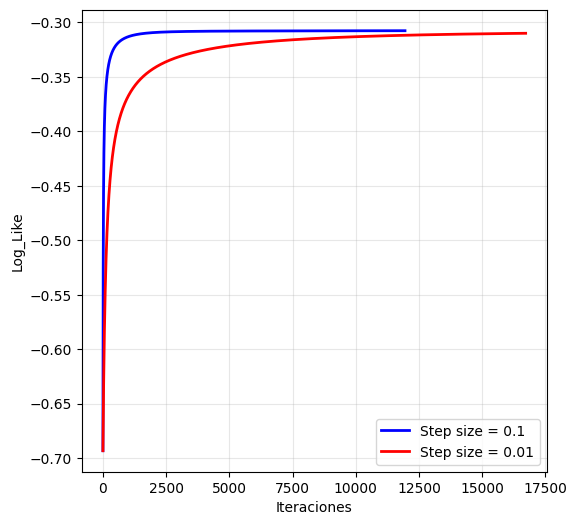

In [22]:
### StepSize 0.1
step_size_1 = 1e-1
gd_1=gradient_descent(step_size_1,X_train,y_train)
gd_1.fit()

### StepSize 0.01
step_size_2 = 1e-2
gd_2=gradient_descent(step_size_2,X_train,y_train)
gd_2.fit()

plt.figure(figsize=(6, 6))
plt.plot(range(len(gd_1.costo)), gd_1.costo, 'b-', label=f'Step size = {gd_1.step_size}', linewidth=2)
plt.plot(range(len(gd_2.costo)), gd_2.costo, 'r-', label=f'Step size = {gd_2.step_size}', linewidth=2)

plt.xlabel('Iteraciones')
plt.ylabel('Log_Like')
plt.legend()
plt.grid(True, alpha=0.3)

In [23]:
#Parámetros GD para step size = 0.1
param_GD = pd.DataFrame(data=[gd_1.coeficientes], columns=X_train.columns)
param_GD.T

,0
age,-0.393806
trestbps,0.720272
chol,0.209015
thalach,-0.912483
oldpeak,0.221983
sex_0,-0.814668
sex_1,0.819433
cp_1,-1.132375
cp_2,-0.647358
cp_3,0.109566


3. Evaluation

    - Compute accuracy, precision, recall, F1 score in the test set.
    - Compare with sklearn.linear_model.LogisticRegression.

In [24]:
def show_metric(my_metric):
  return "{:.2f}%".format(my_metric * 100)

In [25]:
# Prediciendo con parametros de gd_1
y_pred_prob = f(X_test,gd_2.coeficientes)

# Convertir probabilidades en clases (0 o 1)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

print("accuracy: {}".format(show_metric(accuracy_score(y_test, y_pred_class))))
print("precision: {}".format(show_metric(precision_score(y_test, y_pred_class))))
print("recall: {}".format(show_metric(recall_score(y_test, y_pred_class))))
print("F1 score: {}".format(show_metric(f1_score(y_test, y_pred_class))))
print("matriz de confusion: ", confusion_matrix(y_test, y_pred_class))


accuracy: 84.62%
precision: 92.31%
recall: 76.60%
F1 score: 83.72%
matriz de confusion:  [[41  3]
 [11 36]]


In [26]:
model = LogisticRegression(fit_intercept=False, max_iter=1000, solver='lbfgs')  # solver por defecto
model.fit(X_train, y_train)

y_pred = model.predict(X_test)         # Predicciones (0 o 1)
#y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades

print("skLearn - accuracy: {}".format(show_metric(accuracy_score(y_test, y_pred))))
print("skLearn - precision: {}".format(show_metric(precision_score(y_test, y_pred))))
print("skLearn - recall: {}".format(show_metric(recall_score(y_test, y_pred))))
print("skLearn - F1 score: {}".format(show_metric(f1_score(y_test, y_pred))))

skLearn - accuracy: 84.62%
skLearn - precision: 92.31%
skLearn - recall: 76.60%
skLearn - F1 score: 83.72%


Parte B.

In [27]:
def gd_logreg_binary(X, y, lr=0.1, n_iter=5000, tol=1e-6):
    """
    Descenso de gradiente para regresión logística binaria.
    Retorna:
      w: vector de parámetros (d,1)
      hist: lista del valor del log-likelihood en cada iteración
    """
    n, d = X.shape
    w = np.zeros((d, 1))
    hist = []
    
    for i in range(n_iter):
        z = X @ w
        h = 1 / (1 + np.exp(-z))
        grad = (1/n) * (X.T @ (h - y))
        w -= lr * grad
        
        # log-likelihood (con estabilidad numérica)
        ll = np.mean(y * np.log(h + 1e-9) + (1 - y) * np.log(1 - h + 1e-9))
        hist.append(ll)
        
        # criterio de convergencia
        if i > 0 and abs(hist[-1] - hist[-2]) < tol:
            break
            
    return w, hist


In [28]:
# ============================================
# PART B — One-vs-All (Wine) con tu lógica
# ============================================

RANDOM_STATE = 42
USE_INTERCEPT = True   # si en tu Parte A YA agregas el intercepto dentro del modelo, cambia a False

# helpers mínimos (solo si faltan por nombre)
try:
    add_intercept
except NameError:
    def add_intercept(X): return np.hstack([np.ones((X.shape[0],1)), X])

try:
    sigmoid
except NameError:
    def sigmoid(z): return 1/(1+np.exp(-z))

# === 1) Cargar Wine ===
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)  # {0,1,2}

# === 2) Split 70/30 (estratificado) ===
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

# === 3) Estandarizar TODAS las features (fit en train, transform en test) ===
sc = StandardScaler()
X_trs = sc.fit_transform(X_tr)
X_tes = sc.transform(X_te)

# === 4) Intercepto (según tu pipeline) ===
if USE_INTERCEPT:
    Xtr = add_intercept(X_trs)
    Xte = add_intercept(X_tes)
else:
    Xtr = X_trs
    Xte = X_tes

ytr = y_tr.values
yte = y_te.values
K = np.unique(ytr).size
d = Xtr.shape[1]

# === 5) Entrenar OvA usando tu gd_logreg_binary ===
W_ova = np.zeros((d, K))  # cada columna = w_k
histories_ova = []

for k in range(K):
    y_bin = (ytr == k).astype(int).reshape(-1,1)
    w_k, hist_k = gd_logreg_binary(Xtr, y_bin, lr=0.1, n_iter=6000, tol=1e-9)
    W_ova[:, [k]] = w_k
    histories_ova.append(hist_k)

# === 6) Predicción: argmax de probabilidades sigmoide ===
probs_test = sigmoid(Xte @ W_ova)      # (n_test, K)
y_pred_ova = np.argmax(probs_test, axis=1)

print("=== From-Scratch OvA (Wine) ===")
print("Accuracy:", accuracy_score(yte, y_pred_ova))
print("Confusion matrix:\n", confusion_matrix(yte, y_pred_ova))
print(classification_report(yte, y_pred_ova, digits=4, zero_division=0))

# === 7) Comparación con sklearn OVR ===
sk_ovr = LogisticRegression(
    multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=RANDOM_STATE
)
sk_ovr.fit(X_trs, y_tr)
y_pred_sk = sk_ovr.predict(X_tes)

print("\n=== sklearn LogisticRegression (OVR) ===")
print("Accuracy:", accuracy_score(y_te, y_pred_sk))
print("Confusion matrix:\n", confusion_matrix(y_te, y_pred_sk))
print(classification_report(y_te, y_pred_sk, digits=4, zero_division=0))

# (opc) comparar magnitud de coeficientes (sin intercepto)
try:
    coef_norm_ours = np.linalg.norm(W_ova[1:, :], axis=0) if USE_INTERCEPT else np.linalg.norm(W_ova, axis=0)
    coef_norm_sk   = np.linalg.norm(sk_ovr.coef_, axis=1)
    print("\nNorma L2 coef (ours) :", np.round(coef_norm_ours, 4))
    print("Norma L2 coef (sklearn):", np.round(coef_norm_sk, 4))
except Exception as e:
    pass


=== From-Scratch OvA (Wine) ===
Accuracy: 0.9814814814814815
Confusion matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        18
           1     1.0000    0.9524    0.9756        21
           2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9815    0.9815        54


=== sklearn LogisticRegression (OVR) ===
Accuracy: 0.9814814814814815
Confusion matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        18
           1     1.0000    0.9524    0.9756        21
           2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9815    0.9815      

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


PARTE. C

- Derive the gradient of the log-likelihood function for muticlass classification (check the notebook for session 4)

    \begin{align*}
    L(\theta) & = \prod_{i=1}^n P_\theta (y^{(i)} \mid x^{(i)}) = \prod_{i=1}^n \vec \sigma(\vec z^{(i)})_{y^{(i)}} \\
    & = \prod_{i=1}^n \left( \frac{\exp(\theta_{y^{(i)}}^\top x^{(i)})}{\sum_{l=1}^K \exp(\theta_l^\top x^{(i)})} \right). \\
    \end{align*}

    La funcion **log-likelihood $\ell(\theta)$** tiene la forma: 

    \begin{align*}
    \ell(\theta)=\log[L(\theta)]=\sum_{i=1}^n\left[\theta_{y^{(i)}}x^{(i)}-\ln\left(\sum_{j=1}^k\exp(\theta_jx^{(i)})\right)\right]
    \end{align*}

    Así que derivando con respecto a la clase **m** con su **vector de parámetros $\theta_m$** para una observación $\text{i}$ :

    **Forma expandida**:

    \begin{align*}
            \ell(\theta)=\sum_{i=1}^n\left[\ln\left(e^{(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)}\right)-\ln\left(\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}\right)\right]
    \end{align*}

    Antes de derivar, para el $1^{er}$ término por propiedad de logaritmos:

    \begin{align*}
        \ln\left(e^{(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)}\right) & = (\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)
    \end{align*}

    Entonces quedaría:

    \begin{align*}
            \ell(\theta)=\sum_{i=1}^n\left[(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)-\ln\left(\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}\right)\right]
    \end{align*}

    Empezamos a derivar:

    \begin{align*}
    \frac{\partial}{\partial\theta_m}\left(\sum_{i=1}^n\left[\underbrace{(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)}_{1^{er}\text{ término}}\;\underbrace{-\ln\left(\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}\right)}_{2^{do}\text{ término}}\right]\right)
    \end{align*}

    - Para el $1^\text{er}$ término:

        \begin{align*}
        \frac{\partial}{\partial\theta_m} (\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)
        \end{align*}
    
        $\theta_m$ es un vector de parámetros conformado por todos sus $\beta\text{'s}$. Al derivar con respecto a $\theta_m$ estamos derivando parcialmente con respecto a todos sus componenetes $\beta_m$:

        Para $\beta_{m0}$: 
        
        \begin{aligned}
        \frac{\partial}{\partial\beta_{m0}} (\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p) & = 1
        \end{aligned}

        Para $\beta_{m1}$: 
        
        \begin{align*}
        \frac{\partial}{\partial\beta_{m1}} (\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p) & = x^{(i)}_1
        \end{align*}

        ... hasta $\beta_{mp}$: 
        
        \begin{align*}
        \frac{\partial}{\partial\beta_{mp}} (\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p) & = x^{(i)}_p
        \end{align*}

        Resultando en un vector, que es el vector $x$ para la observacion $i$

        \begin{align*}
        \begin{bmatrix}
        1 \\
        x^{(i)}_1 \\
        x^{(i)}_2 \\
        ... \\
        x^{(i)}_p
        \end{bmatrix}
        & = x^{(i)}
        \end{align*}

        Ahora como estamos tomando una observacion $i$ tenemos que usar **una función indicador** que nos señale si esa observación pertenece a la clase **m**:

        \begin{align*}
        \mathbb{1}\left\{ y^{(i)}= m \right\}
        \end{align*}

        Donde $1$ si esa observación $i$ pertenece a **m**, caso contrario $0$. Quedándonos nuestro primer término:

        \begin{align*}
        \mathbb{1}\left\{ y^{(i)}= m \right\} x^{(i)}
        \end{align*}

    - Para el $2^\text{do}$ término:

        \begin{align*}
        \frac{\partial}{\partial\theta_m} \left[ -\ln\left(\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}\right) \right]
        \end{align*}

        Derivamos lo que esta dentro de $\ln$, aplicamos regla de la cadena:

        \begin{align*}
        -\frac{1}{\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}} \cdot \frac{\partial }{\partial\theta_m}\left(\sum_{j=1}^Ke^{(\beta_{j0}...)} \right)
        \end{align*}

        Al derivar toda la sumatoria con respecto a $\theta_m$ **solo nos importa el termino de la sumatoria que contenga los $\beta_m$** ya que los demás que no dependen de $\theta_m$ se vuelven $0\text{'s}$, así que reescribimos:

        \begin{align*}
        -\frac{1}{\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}} \cdot \frac{\partial }{\partial\theta_m} \left(e^{(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)} \right)
        \end{align*}

        Derivamos $\text{euler}$ y volvemos a aplicar regla de la cadena al exponente de $e$:

        \begin{align*}
        -\frac{1}{\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}} \cdot e^{(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)} \cdot 
        \frac{\partial }{\partial\theta_m}\left(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p\right)
        \end{align*}

        Pero esto ya lo conocemos del $1^\text{er}$ término:

        \begin{align*}
        \frac{\partial}{\partial\theta_m} (\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p) & = 
        \begin{bmatrix}
        1 \\
        x^{(i)}_1 \\
        x^{(i)}_2 \\
        ... \\
        x^{(i)}_p
        \end{bmatrix}
        & = x^{(i)}
        \end{align*}

        Entonces el $2^\text{do}$ término quedaría:

        \begin{align*}
        -\frac{1}{\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}} \cdot e^{(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)} \cdot 
        x^{(i)}
        \end{align*}

        \begin{align*}
        -\frac{e^{(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)}}{\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}} \cdot 
        x^{(i)}
        \end{align*}

        Esta fracción es **softmax Regression en forma extendida**:

        \begin{align*}
        \frac{e^{(\beta_{m0}+\beta_{m1}x^{(i)}_1+...+\beta_{mp}x^{(i)}_p)}}{\sum_{j=1}^K e^{(\beta_{j0}+\beta_{j1}x^{(i)}_1+...+\beta_{jp}x^{(i)}_p)}} = P(y^{(i)}=m | x^{(i)}) = p_{im}
        \end{align*}

        Por lo tanto el $2^\text{do}$ término nos queda:

        \begin{align*}
        -p_{im}x^{(i)}
        \end{align*}

    #### Uniendo términos:

    - $1^\text{er}$ término:

    \begin{align*}
    \mathbb{1}\left\{ y^{(i)}= m \right\} x^{(i)}
    \end{align*}

    - $2^\text{do}$ término:

    \begin{align*}
    -p_{im}x^{(i)}
    \end{align*}

    - Función original:

    \begin{align*}
    \frac{\partial\ell(\theta)}{\partial\theta_m}=\sum_{i=1}^n\left[\underbrace{(\beta_{m0}+\beta_{m1}x^{(i)}_1...+\beta_{m p}x^{(i)}_p)}_{1^{er}\text{ término}}\;\underbrace{-\ln\left(\sum_{j=1}^Ke^{(\beta_{j0}+\beta_{j1}x^{(i)}_1...+\beta_{j p}x^{(i)}_p)}\right)}_{2^{do}\text{ término}}\right]
    \end{align*}


    \begin{align*}
    \frac{\partial\ell(\theta)}{\partial\theta_m}=\sum_{i=1}^n\left(\mathbb{1}\left\{ y^{(i)}= m \right\} x^{(i)} -p_{im}x^{(i)}\right)
    \end{align*}

    Factor común y finalmente **gradiente final**: 

    \begin{align*}
    \boxed{
    \frac{\partial\ell(\theta)}{\partial\theta_m}=\sum_{i=1}^n\left(\mathbb{1}\left\{ y^{(i)}= m \right\}-p_{im}\right) x^{(i)} 
    }
    \end{align*}

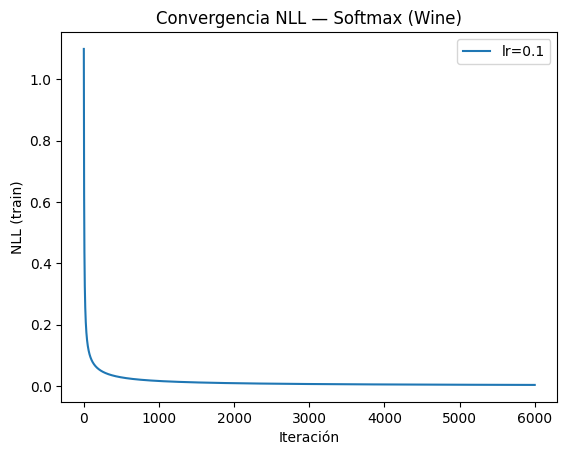

=== From-Scratch Softmax (Wine) ===
Accuracy: 0.9814814814814815
Confusion matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        18
           1     1.0000    0.9524    0.9756        21
           2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9815    0.9815        54


=== sklearn LogisticRegression (Multinomial, lbfgs) ===
Accuracy: 0.9814814814814815
Confusion matrix:
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0     0.9474    1.0000    0.9730        18
           1     1.0000    0.9524    0.9756        21
           2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [29]:
# ============================================
# PART C — Multinomial (Softmax) from scratch
# (mismo split/escala que Part B)
# ============================================
def softmax(Z):
    Zs = Z - np.max(Z, axis=1, keepdims=True)
    EZ = np.exp(Zs)
    return EZ / np.sum(EZ, axis=1, keepdims=True)

def one_hot_int(y, K):
    Y = np.zeros((y.shape[0], K))
    Y[np.arange(y.shape[0]), y] = 1.0
    return Y

def nll_multinomial_and_grad(W, X, y_int):
    # W: (d,K), X: (n,d)
    P = softmax(X @ W)                 # (n,K)
    Y = one_hot_int(y_int, W.shape[1]) # (n,K)
    eps = 1e-12
    nll = -np.mean(np.sum(Y * np.log(P + eps), axis=1))
    grad = (X.T @ (P - Y)) / X.shape[0]
    return nll, grad

def gd_logreg_multinomial(X, y_int, lr=0.1, n_iter=6000, tol=1e-9, verbose=False):
    d = X.shape[1]
    K = np.unique(y_int).size
    W = np.zeros((d, K))
    hist = []
    prev = None
    for i in range(n_iter):
        loss, g = nll_multinomial_and_grad(W, X, y_int)
        W -= lr * g
        hist.append(loss)
        if verbose and i % 200 == 0:
            print(f"iter {i:4d}  NLL={loss:.6f}")
        if prev is not None and abs(prev - loss) < tol:
            break
        prev = loss
    return W, hist

# Reutilizamos X_trs/X_tes del Part B; añadimos intercepto según tu pipeline
if USE_INTERCEPT:
    Xtr_m = add_intercept(X_trs)
    Xte_m = add_intercept(X_tes)
else:
    Xtr_m = X_trs
    Xte_m = X_tes

ytr_m = y_tr.values
yte_m = y_te.values
K = np.unique(ytr_m).size

# Entrena (dos lrs para ver convergencia si quieres)
W_soft, hist_soft = gd_logreg_multinomial(Xtr_m, ytr_m, lr=0.1, n_iter=6000, tol=1e-9)
# W_soft2, hist_soft2 = gd_logreg_multinomial(Xtr_m, ytr_m, lr=0.05, n_iter=6000, tol=1e-9)

plt.figure()
plt.plot(hist_soft, label="lr=0.1")
# plt.plot(hist_soft2, label="lr=0.05")
plt.xlabel("Iteración"); plt.ylabel("NLL (train)")
plt.title("Convergencia NLL — Softmax (Wine)")
plt.legend(); plt.show()

# Predicción
P_te = softmax(Xte_m @ W_soft)
y_pred_soft = np.argmax(P_te, axis=1)

print("=== From-Scratch Softmax (Wine) ===")
print("Accuracy:", accuracy_score(yte_m, y_pred_soft))
print("Confusion matrix:\n", confusion_matrix(yte_m, y_pred_soft))
print(classification_report(yte_m, y_pred_soft, digits=4, zero_division=0))

# Comparación sklearn multinomial
sk_multi = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=5000, random_state=RANDOM_STATE)
sk_multi.fit(X_trs, y_tr)
y_pred_sk_multi = sk_multi.predict(X_tes)

print("\n=== sklearn LogisticRegression (Multinomial, lbfgs) ===")
print("Accuracy:", accuracy_score(y_te, y_pred_sk_multi))
print("Confusion matrix:\n", confusion_matrix(y_te, y_pred_sk_multi))
print(classification_report(y_te, y_pred_sk_multi, digits=4, zero_division=0))
